In [19]:
#!/usr/bin/python

'''
File name : 2017-05-02_grabing_frames_with_opencv.ipynb
Authors : Pierre Albiges, Victor Boutin and Laurent Perrinet
Date created : 2017-04-25
Date last modified : 2017-05-03
Object : Apprehend the OpenRetina project through the manipulation of the PhotoReceptor class

See https://github.com/laurentperrinet/openRetina/blob/master/src/openRetina.py as source for the program
See https://github.com/pierrealbiges/INT-internship/ for associated documents
'''

%matplotlib inline
import matplotlib.pyplot as plt
from __future__ import division, print_function
import array
import time
import numpy as np
import cv2
from multiprocessing.pool import ThreadPool
from collections import deque
from distutils.version import LooseVersion

np.set_printoptions(precision=2, suppress=True)

class PhotoReceptor :
    
    def __init__(self, w, h, cam_id=0, DOWNSCALE=1, verbose = True) :

        ''' On Unix systems '''

        self.h, self.w = h, w
        self.rpi = False
        self.cap = cv2.VideoCapture(cam_id)
        
        if verbose: print ("Before downscale. dim1 : {0}, dim2 : {1}".format(self.h,self.w))

        if LooseVersion(cv2.__version__).version[0] == 2:

            self.cap.set(cv2.cv.CV_CAP_PROP_FRAME_WIDTH, self.w)
            self.cap.set(cv2.cv.CV_CAP_PROP_FRAME_HEIGHT, self.h) 

            self.DOWNSCALE = DOWNSCALE
            if DOWNSCALE > 1 :
                W = self.cap.get(cv2.cv.CV_CAP_PROP_FRAME_WIDTH)
                H = self.cap.get(cv2.cv.CV_CAP_PROP_FRAME_HEIGHT) #Why not working direcy on w, h?
                self.cap.set(cv2.cv.CV_CAP_PROP_FRAME_WIDTH, W//self.DOWNSCALE)
                self.cap.set(cv2.cv.CV_CAP_PROP_FRAME_HEIGHT, H//self.DOWNSCALE)
            self.h, self.w = self.cap.get(cv2.cv.CV_CAP_PROP_FRAME_HEIGHT), self.cap.get(cv2.cv.CV_CAP_PROP_FRAME_WIDTH)
            if verbose: print ('Using OpenCV')
        
        else:     

            self.cap.set(cv2.CAP_PROP_FRAME_WIDTH, self.w)
            self.cap.set(cv2.CAP_PROP_FRAME_HEIGHT, self.h)

            self.DOWNSCALE = DOWNSCALE
            if DOWNSCALE > 1:
                W = self.cap.get(cv2.CAP_PROP_FRAME_WIDTH)
                H = self.cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
                self.cap.set(cv2.CAP_PROP_FRAME_WIDTH, W//self.DOWNSCALE)
                self.cap.set(cv2.CAP_PROP_FRAME_HEIGHT, H//self.DOWNSCALE)
            self.h, self.w = self.cap.get(cv2.CAP_PROP_FRAME_HEIGHT), self.cap.get(cv2.CAP_PROP_FRAME_WIDTH)
            if verbose: print('Using OpenCV3')

        if verbose: print ("After downscale {0}. dim1 : {1}, dim2 : {2}".format(self.DOWNSCALE,self.h,self.w))


    def grab(self) :
        ret, frame_bgr = self.cap.read()
        #frame = frame_bgr[:, :, ::-1] #BGR to RBG.
        frame = frame_bgr
        return frame
    
    def close(self) :
        self.cap.release()
        del self.cap

In [20]:
'''  Version a : Run the program and calculate the framerate (limit = number of frames recorded) '''

num_frames = 50
downscales_a, frames_a = [], []
for ds in np.arange(1,7,0.5):
    Ph = PhotoReceptor(w=1280, h=720, DOWNSCALE = ds)

    time.sleep(1)
    start = time.time()

    for i in range(num_frames):
        frame = Ph.grab()

    seconds = time.time() - start
        
    Ph.close()

    fps = num_frames / seconds
    frames_a.append(fps)
    downscales_a.append(ds)
    print ('Frame rate %s : \n' % fps)

Before downscale. dim1 : 720, dim2 : 1280
Using OpenCV
After downscale 1.0. dim1 : 720.0, dim2 : 1280.0
Frame rate : 13.5616456605 

Before downscale. dim1 : 720, dim2 : 1280
Using OpenCV
After downscale 1.5. dim1 : 480.0, dim2 : 720.0
Frame rate : 14.1097250673 

Before downscale. dim1 : 720, dim2 : 1280
Using OpenCV
After downscale 2.0. dim1 : 288.0, dim2 : 352.0
Frame rate : 14.0390169357 

Before downscale. dim1 : 720, dim2 : 1280
Using OpenCV
After downscale 2.5. dim1 : 288.0, dim2 : 352.0
Frame rate : 14.0380038856 

Before downscale. dim1 : 720, dim2 : 1280
Using OpenCV
After downscale 3.0. dim1 : 240.0, dim2 : 320.0
Frame rate : 14.0449045404 

Before downscale. dim1 : 720, dim2 : 1280
Using OpenCV
After downscale 3.5. dim1 : 144.0, dim2 : 176.0
Frame rate : 14.046265729 

Before downscale. dim1 : 720, dim2 : 1280
Using OpenCV
After downscale 4.0. dim1 : 144.0, dim2 : 176.0
Frame rate : 14.0458358019 

Before downscale. dim1 : 720, dim2 : 1280
Using OpenCV
After downscale 4.5. 

In [22]:
''' Version b : Run the program and calculate the framerate (limit = time recorded) '''

downscales_b, frames_b = [], []
for ds in np.arange(0.5,7,0.5):
    Ph = PhotoReceptor(w=1280, h=720, DOWNSCALE = ds)
    Rec = True
    nb_frames = 0

    start = time.time()

    while(Rec == True):

        frame = Ph.grab()
        nb_frames += 1
        
        seconds = time.time() - start
        
        if seconds >= 10 :
            Rec = False
            
    Ph.close()

    fps = nb_frames / seconds
    frames_b.append(fps)
    downscales_b.append(ds)
    print ('Frame rate : %s \n' % fps)

Before downscale. dim1 : 720, dim2 : 1280
Using OpenCV
After downscale 0.5. dim1 : 720.0, dim2 : 1280.0
Frame rate : 15.6858104939 

Before downscale. dim1 : 720, dim2 : 1280
Using OpenCV
After downscale 1.0. dim1 : 720.0, dim2 : 1280.0
Frame rate : 15.6970913459 

Before downscale. dim1 : 720, dim2 : 1280
Using OpenCV
After downscale 1.5. dim1 : 480.0, dim2 : 720.0
Frame rate : 16.0453975752 

Before downscale. dim1 : 720, dim2 : 1280
Using OpenCV
After downscale 2.0. dim1 : 288.0, dim2 : 352.0
Frame rate : 15.9108548387 

Before downscale. dim1 : 720, dim2 : 1280
Using OpenCV
After downscale 2.5. dim1 : 288.0, dim2 : 352.0
Frame rate : 15.9104417817 

Before downscale. dim1 : 720, dim2 : 1280
Using OpenCV
After downscale 3.0. dim1 : 240.0, dim2 : 320.0
Frame rate : 15.8798483656 

Before downscale. dim1 : 720, dim2 : 1280
Using OpenCV
After downscale 3.5. dim1 : 144.0, dim2 : 176.0
Frame rate : 15.912397485 

Before downscale. dim1 : 720, dim2 : 1280
Using OpenCV
After downscale 4.0.

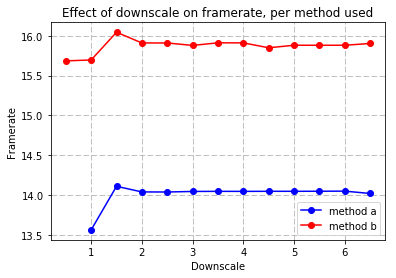

In [25]:
plt.plot(downscales_a, frames_a, 'b', marker='o', label='method a')
plt.plot(downscales_b, frames_b, 'r', marker='o', label='method b')
plt.grid(linestyle='--')
plt.legend()
plt.title('Effect of downscale on framerate, per method used')
plt.xlabel('Downscale')
plt.ylabel('Framerate')
plt.show()

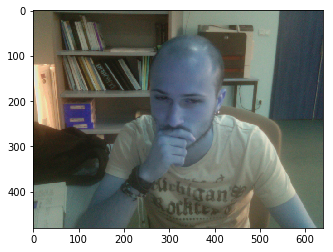

In [117]:
plt.imshow(frame)

In [1]:
'''
Program allowing to communicate with a camera connected on a RaspBerry Pi. 
Later will be able to recording and manipulate the data.

See  http://picamera.readthedocs.io for main source of the program
'''

''' Server script '''

import io #Allows to work with streams on python
import socket
import struct #Allows the convertion between binary data (here from connection network) and python strings 
from PIL import Image

server_socket = socket.socket()      #Create a new socket
server_socket.bind(('0.0.0.0',8000)) #Bind the socket to the adress
server_socket.listen(0)              #Listen the connection made to the socket

print('debugging key n.1')
connection = server_socket.accept()[0] #Accept the connection. The socket must be binded and listened
print('debugging key n.2')
connection.makefile('rb') #Create a file that'll contain the connection informations
print('debugging key n.3')

access = True
while access == True :
    image_len = struct.unpack('<L', connection.read(struct.calcsize('<L')))[0] #Unpack the string ; .unpack(format, string)
    if not image_len: #If the string is empty (length = 0) or is missing, break the connection
        print('Image length missing or zero')
        access = False
    
    image_stream = io.BytesIO()
    image_stream.write(connection.read(image_len))
    image_stream.seek(0)
    
    image = Image.open(image_stream)
    image.verify()

connection.close()    #Close the connection
server_socket.close() # Close the socket

debugging key n.2


KeyboardInterrupt: 

In [ ]:
''' Client script '''